# Agenda

1) Understanding Glove (15 min)
  * Emergence of Glove
  * Conceptualization of Glove

2) Glove in practice (30 min)

3) Glove usage in building Neural netwoks (keras) (30 min)


#### GDown data files

In [1]:
!gdown --id 1wg8LXo5UuFWMMP-x5xatcgdwVTKUr6nM # Downalod the glove embedding file
!gdown --id 13_fLda1Hpm-9wYf6s_nLhhoHrQI0Fe5p # cosine similarity image

Downloading...
From: https://drive.google.com/uc?id=1wg8LXo5UuFWMMP-x5xatcgdwVTKUr6nM
To: /content/glove.6B.100d.txt
100% 347M/347M [00:03<00:00, 99.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=13_fLda1Hpm-9wYf6s_nLhhoHrQI0Fe5p
To: /content/cosine-similarity.png
100% 9.65k/9.65k [00:00<00:00, 29.8MB/s]


In [ ]:
from IPython.display import Image

## Here we first load the glove vectors as a dictionary - `embeddings_index`
`embeddings_index['banana']` would give some 100 length vector for the word `'banana'`

The object `GLOVE_DIR` points to the text file which containes the vectors, but it could also be downloaded form http://nlp.stanford.edu/data/glove.6B.zip and saved on disk

In [ ]:
import numpy as np
print('Indexing word vectors.')
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
print(embeddings_index['banana'])
print(embeddings_index['banana'].shape)

[-0.34028    0.46436   -0.083324   0.20186   -0.17831   -0.4663
  0.61793    0.30129    0.5728    -0.34783   -0.9216     0.30484
  0.30382    0.58035    0.12112    0.77288    1.1547    -0.576
  0.51471    0.21552    0.21106    0.67875    1.1962     0.11142
  0.50809    1.1873     0.035288  -0.88952    0.042803  -0.36714
  0.37993    0.61945    1.0194    -0.95084   -0.0072258  0.69454
  0.38692   -0.18544    0.2885    -0.81279   -0.46473   -0.82623
  0.42778   -0.14064    0.30173    0.074418  -0.40044    0.33969
 -0.62917   -0.054449  -0.78469    0.2354    -0.78359    0.74708
 -0.31074   -0.07038   -0.34623    0.33849    0.89621    0.30288
  0.012978   0.020869  -0.14436   -0.40914    0.16651   -0.88124
 -0.078419   0.048156   0.27032   -0.81761    0.027778   0.62487
  0.1549    -0.15838    0.088675   0.063411  -0.14473   -0.0066816
 -0.18535    1.5642     0.3726    -0.81706   -0.021685   0.91209
 -0.35784   -0.98389   -0.37103   -0.10909    0.18898   -0.33884
 -0.058326   0.41438   -1.

## Highlights of GloVe embeddings

### 1) Nearest Neighbours (for word `compute`) using Cosine Similarity

The Euclidean distance (or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words.


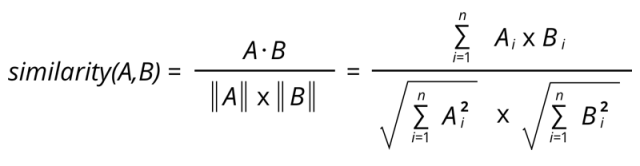

In [ ]:
Image("cosine-similarity.png")

In [ ]:
u = embeddings_index['compute']
norm_u = np.linalg.norm(u)
similarity = []


for word in embeddings_index.keys():
    v = embeddings_index[word]
    cosine = np.dot(u, v)/(norm_u * np.linalg.norm(v))
    similarity.append((word, cosine))


print(len(similarity))

400000


In [ ]:
sorted(similarity, key=lambda x: x[1], reverse=True)[:10]

[('compute', 0.99999994),
 ('calculate', 0.7222062),
 ('algorithm', 0.6441058),
 ('computed', 0.6136234),
 ('algorithms', 0.6134383),
 ('equivalently', 0.59991413),
 ('formula_1', 0.59704244),
 ('formula_2', 0.5948517),
 ('formula_3', 0.5931289),
 ('formula_5', 0.59209335)]

### 2) Linear Substructures

#### Problem with Similarity Measure (scalar number)

The similarity metrics used for nearest neighbor evaluations produce a `single scalar` that quantifies the relatedness of two words. This can be problematic since two given words may exhibit more intricate relationships than can be captured by a single number.

__Example:__ Man may be regarded as similar to woman in that both words describe human beings; 

on the other hand, the two words are often considered opposites since they specify how humans differ from one another.

__Solution:__ In order to capture in a `quantitative` way the nuances that distinguish man from woman, it is necessary to think beyond assigning a scalar to both words. A natural and simple candidate is the vector difference between the two word vectors.

__GloVe__ is designed in order that such vector differences capture as much as possible the meaning specified by the juxtaposition of two words.

__Example Question:__ what is the relationship between `France` and `Paris`? Can we use this relationship to extract other capitals around the world?

First we subtract the vector for `france` from `paris`. This could be imagined as a vector pointing from country to its capital. Then we add the vector of `nepal`. Let's see if it does point to the country's capital

In [ ]:
output = embeddings_index['paris'] - embeddings_index['france'] + embeddings_index['nepal']
norm_out = np.linalg.norm(output)

similarity = []
for word in embeddings_index.keys():
    v = embeddings_index[word]
    cosine = np.dot(output, v)/(norm_out * np.linalg.norm(v))
    similarity.append((word, cosine))


print(len(similarity))

400000


In [ ]:
sorted(similarity, key=lambda x: x[1], reverse=True)[:7]

[('kathmandu', 0.80391634),
 ('nepal', 0.7563891),
 ('katmandu', 0.70364904),
 ('dhaka', 0.65562445),
 ('nepali', 0.6497055),
 ('delhi', 0.6469099),
 ('bangkok', 0.60852313)]

__Observation:__ The underlying concept that distinguishes `paris` from `france`, i.e. capital, may be equivalently specified by various other word pairs, such as `kathmandu` and `nepal` or `london` and `united kingdom`. 

To state this observation mathematically, we might expect that the vector differences paris - france and london - united kingdom might all be roughly equal. 

### Another example of demonstrating `gender`

In [ ]:
output = embeddings_index['king'] - embeddings_index['queen'] + embeddings_index['woman']
norm_out = np.linalg.norm(output)

similarity = []
for word in embeddings_index.keys():
    v = embeddings_index[word]
    cosine = np.dot(output, v)/(norm_out * np.linalg.norm(v))
    similarity.append((word, cosine))


print(len(similarity))

400000


In [ ]:
sorted(similarity, key=lambda x: x[1], reverse=True)[:7]

[('man', 0.79038405),
 ('woman', 0.77417654),
 ('father', 0.7262259),
 ('son', 0.7059727),
 ('boy', 0.69850194),
 ('another', 0.6857764),
 ('person', 0.67366713)]

## Gensim package

Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling.

But its efficient and scalable, and quite widely used.

In [2]:
import gensim.downloader as api

In [3]:
import json
info = api.info()
print(json.dumps(info, indent=4))

{
    "corpora": {
        "semeval-2016-2017-task3-subtaskBC": {
            "num_records": -1,
            "record_format": "dict",
            "file_size": 6344358,
            "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py",
            "license": "All files released for the task are free for general research use",
            "fields": {
                "2016-train": [
                    "..."
                ],
                "2016-dev": [
                    "..."
                ],
                "2017-test": [
                    "..."
                ],
                "2016-test": [
                    "..."
                ]
            },
            "description": "SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collect

In [4]:
# download the model and return as object ready for use
model_glove_100 = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [6]:
model_glove_100.most_similar("learn",topn=10)

[('understand', 0.8660688400268555),
 ('learned', 0.8452479839324951),
 ('teach', 0.8227170705795288),
 ('know', 0.7624406218528748),
 ('how', 0.7615156173706055),
 ('realize', 0.7587652802467346),
 ('find', 0.756231427192688),
 ('tell', 0.7523771524429321),
 ('explain', 0.7495036125183105),
 ('able', 0.7493653297424316)]

In [7]:
model_glove_100.most_similar("banana",topn=10)

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [ ]:
model_glove_100.most_similar(negative='banana', topn=10) #negative: List of words that contribute negatively.

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [8]:
result = model_glove_100.most_similar(positive=['woman', 'king'], negative=['man']) #similar to woman - man + king
result

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [9]:
# Which one is the odd one out in this list?
model_glove_100.doesnt_match(["cat","dog","france"])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'france'

In [10]:
def analogy(x1, x2, y1):
    result = model_glove_100.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [11]:
analogy('australia', 'beer', 'france')

'champagne'

In [12]:
analogy('tall', 'tallest', 'long')

'longest'

In [13]:
analogy('india', 'cricket', 'australia')

'rugby'

In [14]:
analogy('italy', 'pizza', 'india')

'kfc'

In [15]:
analogy('australia', 'beer', 'india')

'drink'

In [ ]:
analogy('india', 'ndtv', 'usa')

'newstalkzb'

In [ ]:
analogy('india', 'cricket', 'usa')

'rugby'

In [16]:
analogy('paris', 'france', 'india')

'pakistan'

# References:

https://nlp.stanford.edu/projects/glove/

https://www.youtube.com/watch?v=kEMJRjEdNzM&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=2

http://web.stanford.edu/class/cs224n/slides/cs224n-2020-lecture02-wordvecs2.pdf
